In [137]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [138]:
import pandas as pd
import io

# Define the data as a multi-line string
data = """Outlook,Temperature,Humidity,Wind,Play Tennis
Sunny,Hot,High,Weak,No
Sunny,Hot,High,Strong,No
Overcast,Hot,High,Weak,Yes
Rain,Mild,High,Weak,Yes
Rain,Cool,Normal,Weak,Yes
Rain,Cool,Normal,Strong,No
Overcast,Cool,Normal,Strong,Yes
Sunny,Mild,High,Weak,No
Sunny,Cool,Normal,Weak,Yes
Rain,Mild,Normal,Weak,Yes
Sunny,Mild,Normal,Strong,Yes
Overcast,Mild,High,Strong,Yes
Overcast,Hot,Normal,Weak,Yes
Rain,Mild,High,Strong,No"""

# Create a Pandas DataFrame
dataset = pd.read_csv(io.StringIO(data))

# Print the dataset
print(dataset)

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No


In [139]:
class Node():
    """
    A class representing a node in a decision tree.
    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        """
        Initializes a new instance of the Node class.

        Args:
            feature: The feature used for splitting at this node. Defaults to None.
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None.
            right: The right child node. Defaults to None.
            gain: The gain of the split. Defaults to None.
            value: If this node is a leaf node, this attribute represents the predicted value
                for the target variable. Defaults to None.
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

In [140]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=2, max_depth=2):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        # Create empty arrays to store the left and right datasets
        left_dataset = []
        right_dataset = []

        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            entropy (float): Entropy of the given label values.
        """
        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples) / len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)

        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            information_gain (float): Information gain of the split.
        """
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain
        information_gain = parent_entropy - weighted_entropy
        return information_gain


    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain,
              left and right datasets.
        """
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split


    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value

    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)

    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        # Reshape y to be a 2D array
        y = y.values.reshape(-1, 1)
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for i in range(X.shape[0]):
            prediction = self.make_prediction(X.iloc[i, :].values, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        return np.array(predictions)

    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

In [141]:
def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 41.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train using iloc
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

In [142]:
def accuracy(y_true, y_pred):
    """
    Calculate the accuracy of the model.

    Parameters:
    ----------
        y_true (ndarray): The true target values.
        y_pred (ndarray): The predicted target values.

    Returns:
    ----------
        float: The accuracy of the model
    """
    y_true = y_true.to_numpy().flatten()
    y_pred = np.array(y_pred).flatten()
    
    # Print shapes for debugging
    # print(f"Shape of y_true: {y_true.shape}")
    # print(f"Shape of y_pred: {y_pred.shape}")
    
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [143]:
# Split the dataset into features (X) and target (y)
X = dataset.drop(columns=['Play Tennis'])
y = dataset['Play Tennis']

# Print the features and target
print("Features (X):")
print(X)
print("\nTarget (y):")
print(y)

Features (X):
     Outlook Temperature Humidity    Wind
0      Sunny         Hot     High    Weak
1      Sunny         Hot     High  Strong
2   Overcast         Hot     High    Weak
3       Rain        Mild     High    Weak
4       Rain        Cool   Normal    Weak
5       Rain        Cool   Normal  Strong
6   Overcast        Cool   Normal  Strong
7      Sunny        Mild     High    Weak
8      Sunny        Cool   Normal    Weak
9       Rain        Mild   Normal    Weak
10     Sunny        Mild   Normal  Strong
11  Overcast        Mild     High  Strong
12  Overcast         Hot   Normal    Weak
13      Rain        Mild     High  Strong

Target (y):
0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [145]:
# Create model instance
model = DecisionTree(2, 2)

# Fit the decision tree model to the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Print shapes for debugging
# print(f"Shape of X_test: {X_test.shape}")
# print(f"Shape of y_test: {y_test.shape}")
# print(f"Shape of y_pred: {y_pred.shape}")

# # Print actual predictions and true labels for debugging
# print("y_test:", y_test.to_numpy())
# print("y_pred:", y_pred)

# Calculate evaluating metrics
print(f"Model's Accuracy: {accuracy(y_test, y_pred)}")

Model's Accuracy: 0.5


In [146]:
def print_tree(self, node=None, depth=0, branch=''):
    """
    Prints a visual representation of the decision tree.
    
    Args:
        node: Current node in tree
        depth: Current depth in tree
        branch: Branch indicator string
    """
    if node is None:
        node = self.root
        
    indent = '  ' * depth + branch
    
    if node.value is not None:
        print(f"{indent}└── Prediction: {node.value}")
    else:
        print(f"{indent}├── Feature {node.feature} <= {node.threshold} (Gain: {node.gain:.4f})")
        self.print_tree(node.left, depth + 1, "├── ")
        self.print_tree(node.right, depth + 1, "└── ")

# Add method to DecisionTree class
DecisionTree.print_tree = print_tree

# Visualize tree
model.print_tree()

├── Feature 0 <= Overcast (Gain: 0.2516)
  ├── └── Prediction: Yes
  └── ├── Feature 1 <= Hot (Gain: 0.1887)
    ├── ├── Feature 0 <= Rain (Gain: 0.3113)
      ├── └── Prediction: Yes
      └── └── Prediction: No
    └── ├── Feature 2 <= High (Gain: 0.3113)
      ├── └── Prediction: No
      └── └── Prediction: Yes


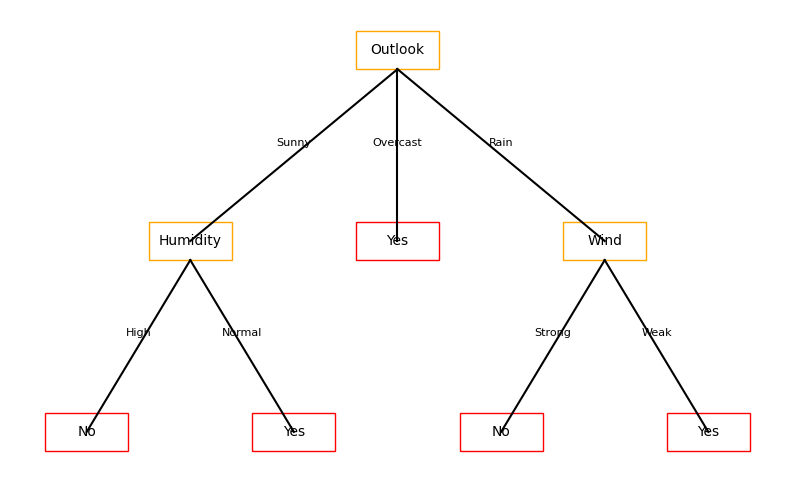

In [147]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, feature=None, condition=None, value=None, left=None, right=None, middle=None):
        self.feature = feature          # Feature name for decision nodes
        self.condition = condition      # Condition or decision rule
        self.value = value              # Value for leaf nodes
        self.left = left                # Left child node
        self.right = right              # Right child node
        self.middle = middle 

def plot_decision_tree(root):
    def plot_node(node, x, y, dx, depth):
        if node is None:
            return
        
        # Plot the current node
        if node.value is not None:
            # Leaf node
            plt.gca().add_patch(plt.Rectangle((x - 0.4, y - 0.1), 0.8, 0.2, edgecolor='red', facecolor='white'))
            plt.text(x, y, f'{node.value}', ha='center', va='center', fontsize=10)
        else:
            # Decision node
            plt.gca().add_patch(plt.Rectangle((x - 0.4, y - 0.1), 0.8, 0.2, edgecolor='orange', facecolor='white'))
            plt.text(x, y, f'{node.feature}', ha='center', va='center', fontsize=10)
            
            # Plot branches and conditions
            if node.left:
                plt.plot([x, x - dx], [y - 0.1, y - 1], 'k-')
                plt.text(x - dx / 2, y - 0.5, f'{node.condition[0]}', fontsize=8, ha='center')
                plot_node(node.left, x - dx, y - 1, dx / 2, depth + 1)
            if node.middle and node.condition and len(node.condition) > 1:
                plt.plot([x, x], [y - 0.1, y - 1], 'k-')
                plt.text(x, y - 0.5, f'{node.condition[2]}', fontsize=8, ha='center')
                plot_node(node.middle, x, y - 1, dx / 2, depth + 1)
            if node.right:
                plt.plot([x, x + dx], [y - 0.1, y - 1], 'k-')
                plt.text(x + dx / 2, y - 0.5, f'{node.condition[1]}', fontsize=8, ha='center')
                plot_node(node.right, x + dx, y - 1, dx / 2, depth + 1)

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    plot_node(root, 0, 0, 2, 0)
    plt.axis('off')
    plt.show()

# Define the tree structure based on your provided image
root = Node(feature='Outlook', condition=('Sunny', 'Rain', 'Overcast'))
root.left = Node(feature='Humidity', condition=('High', 'Normal'))
root.middle = Node(value='Yes')  # Overcast branch directly leads to Yes
root.right = Node(feature='Wind', condition=('Strong', 'Weak'))
root.left.left = Node(value='No')       # Leaf node
root.left.right = Node(value='Yes')     # Leaf node
root.right.left = Node(value='No')      # Leaf node
root.right.right = Node(value='Yes')    # Leaf node

# Visualize the tree
plot_decision_tree(root)


In [148]:
import numpy as np

class Node():
    """
    A node class that holds the information for each node in the decision tree.
    """
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None, gini=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.gini = gini

class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=2, max_depth=2):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        left_dataset = []
        right_dataset = []

        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def gini_index(self, y):
        """
        Computes the Gini index of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            gini (float): Gini index of the given label values.
        """
        gini = 1.0
        labels = np.unique(y)
        for label in labels:
            p = np.sum(y == label) / len(y)
            gini -= p ** 2
        return gini

    def gini_gain(self, parent, left, right):
        """
        Computes the Gini gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            gini_gain (float): Gini gain of the split.
        """
        parent_gini = self.gini_index(parent)
        left_gini = self.gini_index(left)
        right_gini = self.gini_index(right)
        
        weight_left = len(left) / len(parent)
        weight_right = len(right) / len(parent)
        
        weighted_gini = (weight_left * left_gini) + (weight_right * right_gini)
        
        return parent_gini - weighted_gini

    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain,
              left and right datasets.
        """
        best_split = {'gain': -1, 'feature': None, 'threshold': None}

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)

                if len(left_dataset) and len(right_dataset):
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    gini_gain = self.gini_gain(y, left_y, right_y)

                    if gini_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = gini_gain

        return best_split

    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list or ndarray): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        # Convert y to numeric values if they are not already
        y = np.array(y)
        
        if y.dtype == 'O':  # Check if y contains object (non-numeric) types
            # You can encode categorical values into numeric values if necessary
            from sklearn.preprocessing import LabelEncoder
            encoder = LabelEncoder()
            y = encoder.fit_transform(y)
        
        # Return the most frequent class using np.argmax and np.bincount
        return np.argmax(np.bincount(y))


    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape

        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            best_split = self.best_split(dataset, n_samples, n_features)

            if best_split["gain"] > 0:
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                return Node(best_split["feature"], best_split["threshold"], left_node, right_node, gini=best_split["gain"])

        leaf_value = self.calculate_leaf_value(y)
        return Node(value=leaf_value)

    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        y = y.values.reshape(-1, 1)
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        predictions = [self.make_prediction(x, self.root) for x in X.values]
        return np.array(predictions)

    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        if node.value is not None:
            return node.value
        else:
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [150]:
# Create model instance
model = DecisionTree(2, 2)

# Fit the decision tree model to the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Print shapes for debugging
# print(f"Shape of X_test: {X_test.shape}")
# print(f"Shape of y_test: {y_test.shape}")
# print(f"Shape of y_pred: {y_pred.shape}")

# # Print actual predictions and true labels for debugging
# print("y_test:", y_test.to_numpy())
# print("y_pred:", y_pred)

# Calculate evaluating metrics
print(f"Model's Accuracy: {accuracy(y_test, y_pred)}")

Model's Accuracy: 0.0
